<a href="https://colab.research.google.com/github/HesterWen/Stroke_Prediction/blob/main/stroke_predicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
import warnings

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

## 載入資料

In [ ]:
url = 'https://raw.githubusercontent.com/HesterWen/Stroke_Prediction/refs/heads/main/healthcare-dataset-stroke-data.csv?token=GHSAT0AAAAAACZY7MLMP5FNBPDIR4KFYMMCZZZ3UEA'
c = requests.get(url).content
df = pd.read_csv(io.StringIO(c.decode('utf-8')))  # 將解碼後的字串當作檔案

# 移除id
df = df.drop(labels=['id'], axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## 處理缺失值

In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [ ]:
# 使用中位數填補缺失值
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [ ]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,5110.000000,5110,5110.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.698018,NaN,0.215320
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.800000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.400000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,32.800000,NaN,0.000000


## 視覺化分析

*   將age、hypertension、heart_disease、avg_glucose_level、bmi等特徵於stroke的影響作比較，影響最大者為 **age**

<Axes: >

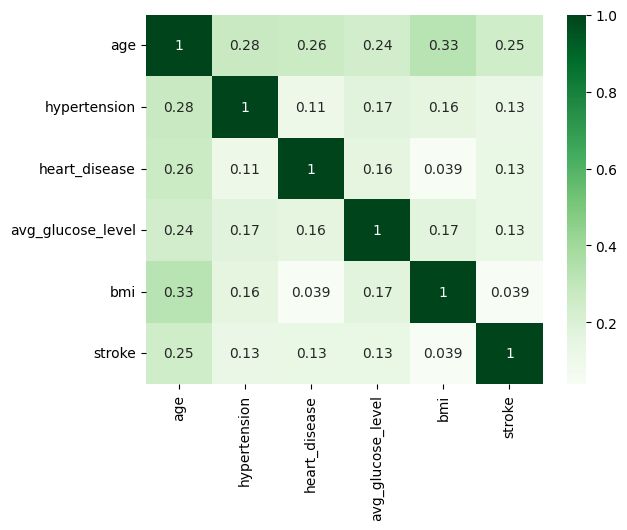

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Greens")

* 40至80歲的樣本佔較多數   


<Axes: xlabel='age', ylabel='Density'>

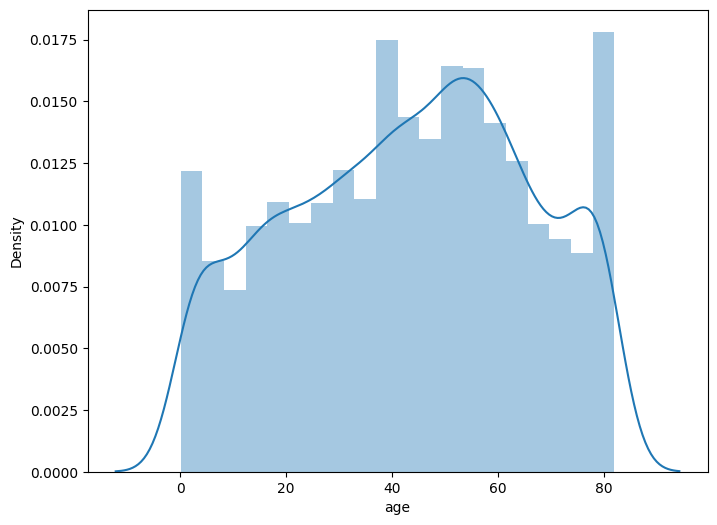

In [ ]:
plt.figure(figsize=(8, 6))
sns.distplot(df['age'])

* 類別stroke有不平衡的現象，沒有中風的比例較高

<Axes: xlabel='stroke', ylabel='count'>

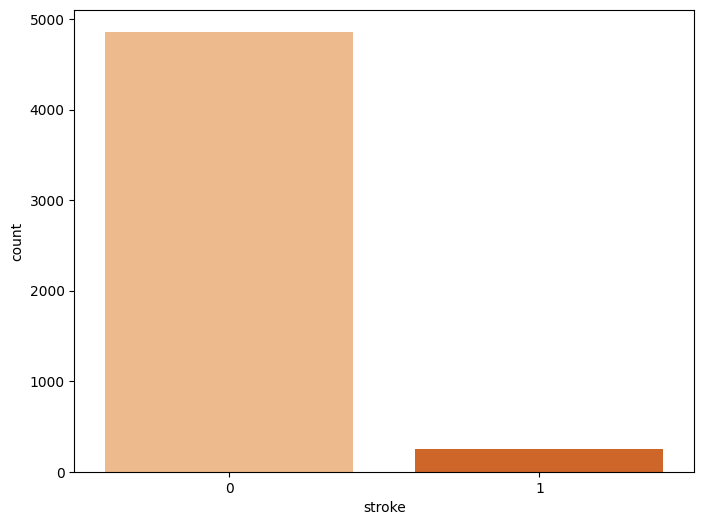

In [ ]:
plt.figure(figsize=(8, 6))
data = pd.DataFrame(df['stroke'])
sns.countplot(x="stroke", data=data, palette="Oranges")

## 特徵工程

In [ ]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)]
)

In [ ]:
X = df.drop('stroke', axis=1)
y = df['stroke']

## 切割訓練集與測試集

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=21)

## 正規化

In [ ]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Training data shape:  (4088, 19)
Testing data shape:  (1022, 19)


## 建立 Logistic Regression 模型

In [ ]:
# 建立模型
lrModel = LogisticRegression(solver='saga', class_weight='balanced')  # 利用class_weight='balanced'自動平衡類別權重
# 利用訓練集資料訓練模型
lrModel.fit(X_train, y_train)
# 預測測試集
lr_pred = lrModel.predict(X_test)

# 計算準確率
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy: .2f}")
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy:  0.71
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       972
           1       0.13      0.84      0.22        50

    accuracy                           0.71      1022
   macro avg       0.56      0.77      0.52      1022
weighted avg       0.95      0.71      0.79      1022



## 建立SVC模型


In [ ]:
# 建立模型
svcModel = SVC(kernel='rbf', gamma='auto', C=1, class_weight="balanced")
# 利用訓練集資料訓練模型
svcModel.fit(X_train, y_train)
# 預測測試集
svc_pred = svcModel.predict(X_test)

# 計算準確率
svc_accuracy = accuracy_score(y_test, svc_pred)
print(f"SVC Accuracy: {svc_accuracy: .2f}")
print(classification_report(y_test, svc_pred))

SVC Accuracy:  0.70
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       972
           1       0.12      0.84      0.22        50

    accuracy                           0.70      1022
   macro avg       0.56      0.77      0.52      1022
weighted avg       0.95      0.70      0.79      1022



## 建立KNN模型

In [ ]:
# 建立模型
knnModel = KNeighborsClassifier(n_neighbors=5, algorithm='auto', weights='distance', p=1)  # 利用weights='distance'提升模型準確度
# 利用訓練集資料訓練模型
knnModel.fit(X_train, y_train)
# 預測測試集
knn_pred = knnModel.predict(X_test)

# 計算準確率
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy: .2f}")
print(classification_report(y_test, knn_pred))

KNN Accuracy:  0.95
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.29      0.04      0.07        50

    accuracy                           0.95      1022
   macro avg       0.62      0.52      0.52      1022
weighted avg       0.92      0.95      0.93      1022



## 建立決策樹模型


In [ ]:
# 建立模型
decisiontreeModel = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=30, class_weight="balanced")
# 利用訓練資料訓練模型
decisiontreeModel.fit(X_train, y_train)
# 預測測試集
decisiontree_pred = decisiontreeModel.predict(X_test)

# 計算準確率
decisiontree_accuracy = accuracy_score(y_test, decisiontree_pred)
print(f"DecisionTree Accuracy: {decisiontree_accuracy: .2f}")
print(classification_report(y_test, decisiontree_pred))

DecisionTree Accuracy:  0.74
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       972
           1       0.12      0.64      0.20        50

    accuracy                           0.74      1022
   macro avg       0.55      0.69      0.52      1022
weighted avg       0.93      0.74      0.81      1022



## 建立隨機森林模型

In [ ]:
# 建立模型
randomforestModel = RandomForestClassifier(n_estimators=50, criterion='entropy', class_weight="balanced")
# 利用訓練資料訓練模型
randomforestModel.fit(X_train, y_train)
# 預測測試集
randomforest_pred = randomforestModel.predict(X_test)

# 計算準確率
randomforest_accuracy = accuracy_score(y_test, randomforest_pred)
print(f"RandomForest Accuracy: {randomforest_accuracy: .2f}")
print(classification_report(y_test, randomforest_pred))

RandomForest Accuracy:  0.95
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



## 比較模型

In [ ]:
models_pred = [lr_pred, svc_pred, knn_pred, decisiontree_pred, randomforest_pred]
precisions = []
recalls = []
f1_scores = []
for i in range(5):
  precisions.append(precision_score(y_test, models_pred[i]))
  recalls.append(recall_score(y_test, models_pred[i]))
  f1_scores.append(f1_score(y_test, models_pred[i]))

In [ ]:
result = pd.DataFrame({
    'Algorithm': ['LogisticRegression', 'SVC', 'KNN', 'DecisionTree', 'RandomForest'],
    'Accuracy': [lr_accuracy, svc_accuracy, knn_accuracy, decisiontree_accuracy, randomforest_accuracy],
    'Precision': [precisions[0], precisions[1], precisions[2], precisions[3], precisions[4]],
    'Recall': [recalls[0], recalls[1], recalls[2], recalls[3], recalls[4]],
    'F1-Score': [f1_scores[0], f1_scores[1], f1_scores[2], f1_scores[3], f1_scores[4]]
})
result.index = result.index + 1
pd.options.display.float_format = '{:.1%}'.format
result

,Algorithm,Accuracy,Precision,Recall,F1-Score
1,LogisticRegression,70.6%,12.6%,84.0%,21.9%
2,SVC,70.5%,12.5%,84.0%,21.8%
3,KNN,94.8%,28.6%,4.0%,7.0%
4,DecisionTree,74.3%,11.6%,64.0%,19.6%
5,RandomForest,94.9%,0.0%,0.0%,0.0%


## 結論:模型的參數調整都以提高Precision為目標，其中**KNN分類器**的模型表現最好。